In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob

GT_path='/home/yjk122/IP_temp/EEG_Image_decode/Generation/models/Final_reconstructions/EEGConformer/img_strength_0.5/sub-08' 
Final05_EEGConformer_path='/home/yjk122/IP_temp/EEG_Image_decode/Generation/models/Final_reconstructions/EEGConformer/img_strength_0.5/sub-08'
Final025_EEGConformer_path='/home/yjk122/IP_temp/EEG_Image_decode/Generation/models/Final_reconstructions/EEGConformer/img_strength_0.25/sub-08'
Final075_EEGConformer_path='/home/yjk122/IP_temp/EEG_Image_decode/Generation/models/Final_reconstructions/EEGConformer/img_strength_0.75/sub-08'
Final09_EEGConformer_path='/home/yjk122/IP_temp/EEG_Image_decode/Generation/models/Final_reconstructions/EEGConformer/img_strength_0.9/sub-08'
Highlevel_path='/home/yjk122/IP_temp/EEG_Image_decode/Generation/models/DMHighlevel_reconstructions/ATMS_sub-08'
# Final_encode_path='/home/yjk122/IP_temp/EEG_Image_decode/Generation/models/Final_reconstructions/encoder_low_level/sub-08'
# encode_low_path='/home/yjk122/IP_temp/EEG_Image_decode/Generation/models/Lowlevel_reconstructions/encoder_low_level_sub-08'
EEGConformer_low_path='/home/yjk122/IP_temp/EEG_Image_decode/Generation/models/Lowlevel_reconstructions/EEGConformer_sub-08_avgTrue'


In [2]:

# Function to load image based on index
def load_image(path, index, is_original=False):
    prefix = "original" if is_original else "recon"
    # Look for files matching the pattern with the given index
    img_files = glob.glob(os.path.join(path, f'{prefix}_{index}.png'))[0]
    
    if not img_files:
        return np.zeros((224, 224, 3))  # Placeholder if no images found
    

    img = Image.open(img_files)
    return np.array(img)


# Function to plot multiple images with given indices
# def plot_comparison(indices):
#     for idx in indices:
#         # Create a new figure for each index
#         fig, axes = plt.subplots(2, 3, figsize=(6, 4))
        
#         # First row
#         original_img = load_image(GT_path, idx, is_original=True)
#         encode_low_img = load_image(encode_low_path, idx)
#         atm_low_img = load_image(ATM_low_path, idx)
        
#         # Second row
#         highlevel_img = load_image(Highlevel_path, idx)
#         final_encode_img = load_image(Final_encode_path, idx)
#         final_atm_img = load_image(Final_ATM_path, idx)
        
#         # Plot images
#         axes[0, 0].imshow(original_img)
#         # axes[0, 0].set_title(f'Original Image {idx}')
#         axes[0, 0].axis('off')
        
#         axes[0, 1].imshow(encode_low_img)
#         # axes[0, 1].set_title(f'Encode Low Level {idx}')
#         axes[0, 1].axis('off')
        
#         axes[0, 2].imshow(atm_low_img)
#         # axes[0, 2].set_title(f'ATM Low {idx}')
#         axes[0, 2].axis('off')
        
#         axes[1, 0].imshow(highlevel_img)
#         # axes[1, 0].set_title(f'Highlevel {idx}')
#         axes[1, 0].axis('off')
        
#         axes[1, 1].imshow(final_encode_img)
#         # axes[1, 1].set_title(f'Final Encode {idx}')
#         axes[1, 1].axis('off')
        
#         axes[1, 2].imshow(final_atm_img)
#         # axes[1, 2].set_title(f'Final ATM {idx}')
#         axes[1, 2].axis('off')
        
#         plt.tight_layout()
#         plt.show()
# randomly pick 5 numbers from 0 to 29

# random.seed(42)  # For reproducibility
# indecies_to_plot = random.sample(range(0, 200), 5)
# indecies_to_plot = range(0,6)  # Specify the indices of images to plot
# indecies_to_plot = range(10,15)
# # Example usage - plot images at indices 0, 1, 2
# plot_comparison(indecies_to_plot)


In [3]:
def plot_4xn_comparison(indices,nimages=4,save_path=None,file_name='Fig2_examples.svg'):
    # Randomly select 4 indices
    selected_indices = indices
    
    fig, axes = plt.subplots(6, nimages, figsize=(7, 8))
    
    # Set plot titles for columns
    # for col in range(nimages):
    #     axes[0, col].set_title(f'Image {selected_indices[col]}')
    
    # Set row labels
    # row_labels = ['Original', 'High-level', 'EEG Conformer Low', 'Final 0.25', 'Final 0.5', 'Final 0.75']
    # for row in range(6):
    #     axes[row, 0].set_ylabel(row_labels[row], rotation=90, size='large')
    
    # Fill the grid with images
    for col, idx in enumerate(selected_indices):
        # Original images (first row)
        original_img = load_image(GT_path, idx, is_original=True)
        axes[0, col].imshow(original_img)
        
        # High-level images (second row)
        highlevel_img = load_image(Highlevel_path, idx)
        axes[1, col].imshow(highlevel_img)
        
        # Conformer Low images (third row)
        atm_low_img = load_image(EEGConformer_low_path, idx)
        axes[2, col].imshow(atm_low_img)
        
        # Final025 Conformer images (fourth row)
        final025_Conformer_img = load_image(Final025_EEGConformer_path, idx)
        axes[3, col].imshow(final025_Conformer_img)

        # Final05 Conformer images (fifth row)
        final05_Conformer_img = load_image(Final05_EEGConformer_path, idx)
        axes[4, col].imshow(final05_Conformer_img)

        # Final075 Conformer images (sixth row)
        final075_Conformer_img = load_image(Final075_EEGConformer_path, idx)
        axes[5, col].imshow(final075_Conformer_img)

        
        # Turn off axes for all subplots
        for row in range(6):
            axes[row, col].axis('off')
    
    plt.tight_layout()
        # Save the plot if a save path is provided
    if save_path:
        if not os.path.exists(save_path):
            os.makedirs(save_path)
        full_path = os.path.join(save_path, file_name)
        plt.savefig(full_path, format='svg', bbox_inches='tight')
        print(f"Plot saved to {full_path}")
    plt.show()

# Execute the function
# indecies_to_plot = random.sample(range(0, 200), 5)
# indecies_to_plot = [0, 1, 2, 3, 4]
# plot_4xn_comparison(indecies_to_plot,5)

Plot saved to ./Figures/Fig2_examples.svg


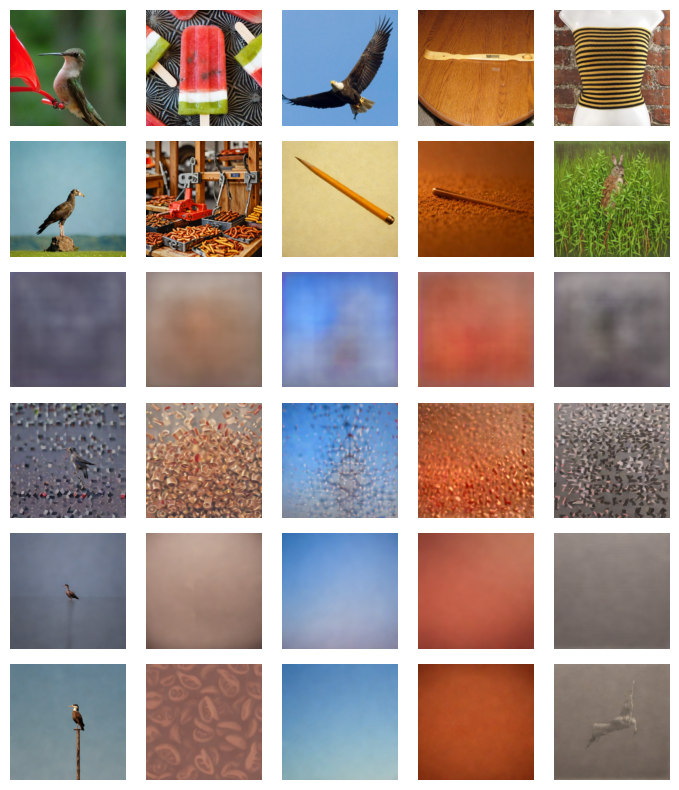

In [35]:
indecies_to_plot = random.sample(range(0, 200), 5)
plot_4xn_comparison(indecies_to_plot,5,save_path='./Figures')

In [40]:
def plot_nx4_comparison(indices, nimages=4, save_path=None, file_name='Fig2_examples_transposed.svg'):
    # Use the provided indices
    selected_indices = indices
    
    # Create figure with transposed dimensions (nimages rows, 6 columns)
    fig, axes = plt.subplots(nimages, 6, figsize=(8, 7))
    
    # Fill the grid with images (transposed layout)
    for row, idx in enumerate(selected_indices):
        # Original images (first column)
        original_img = load_image(GT_path, idx, is_original=True)
        axes[row, 0].imshow(original_img)
        
        # High-level images (second column)
        highlevel_img = load_image(Highlevel_path, idx)
        axes[row, 1].imshow(highlevel_img)
        
        # Conformer Low images (third column)
        atm_low_img = load_image(EEGConformer_low_path, idx)
        axes[row, 2].imshow(atm_low_img)
        
        # Final025 Conformer images (fourth column)
        final025_Conformer_img = load_image(Final025_EEGConformer_path, idx)
        axes[row, 3].imshow(final025_Conformer_img)

        # Final05 Conformer images (fifth column)
        final05_Conformer_img = load_image(Final05_EEGConformer_path, idx)
        axes[row, 4].imshow(final05_Conformer_img)

        # Final075 Conformer images (sixth column)
        final075_Conformer_img = load_image(Final075_EEGConformer_path, idx)
        axes[row, 5].imshow(final075_Conformer_img)

        # Turn off axes for all subplots
        for col in range(6):
            axes[row, col].axis('off')
    
    plt.tight_layout()
    
    # Save the plot if a save path is provided
    if save_path:
        if not os.path.exists(save_path):
            os.makedirs(save_path)
        full_path = os.path.join(save_path, file_name)
        plt.savefig(full_path, format='svg', bbox_inches='tight')
        print(f"Plot saved to {full_path}")
    
    plt.show()

# Example usage:
# indecies_to_plot = random.sample(range(0, 200), 5)
# plot_nx4_comparison(indecies_to_plot, 5, save_path='./Figures')

Plot saved to ./Figures/Fig2_examples_transpose.svg


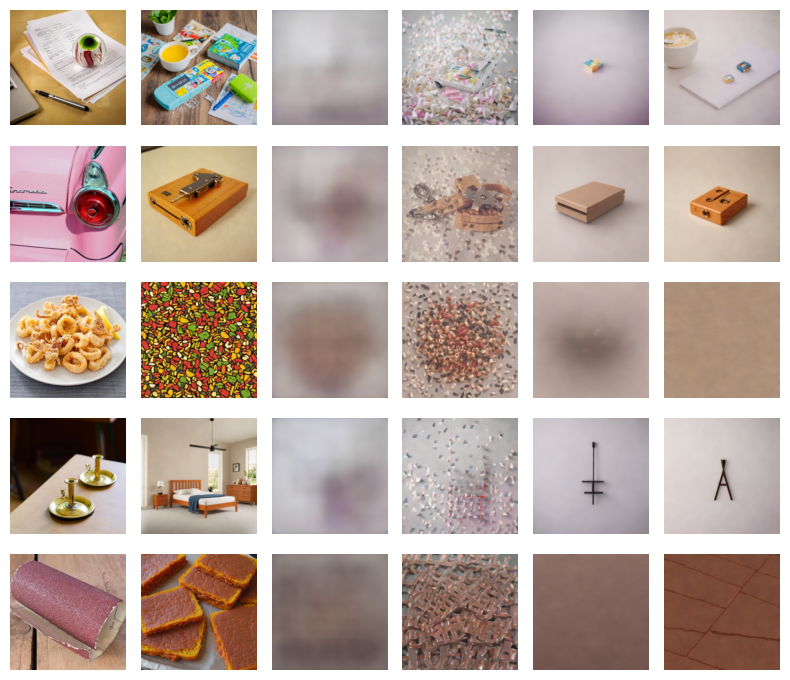

In [41]:
indecies_to_plot = random.sample(range(0, 200), 5)
plot_nx4_comparison(indecies_to_plot,5,save_path='./Figures',file_name='Fig2_examples_transpose.svg')